# Detecting ChatGPT generated text from Human-written text

In [253]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import re

In [254]:
#reading the csv file
df=pd.read_csv('GPT1000.csv', encoding = "utf-8")
df.head()

,Question,Human,ChatGPT
0,what is NLP,NLP is a multidisciplinary field that draws fr...,"NLP, or Natural Language Processing, is a subf..."
1,what are the applications of NLP,There are a variety of emerging applications f...,There are many applications of NLP across vari...
2,what is netiquette,As each new means of communication and social ...,Netiquette is a term used to describe the prop...
3,what did Chuq von Rospach suggest regarding ne...,These suggestions \r\ninclude:\r\n• Learn abou...,Chuq von Rospach is a well-known author and sp...
4,what do the advocates of net neutrality say,In recent years there has been growing concern...,Advocates of net neutrality argue that all int...


### Data reshaping and cleaning

In [255]:
#Creating new dataframes
df1=df['Human']
df2=df['ChatGPT']

In [256]:
df1=df1.to_frame()
df2=df2.to_frame()

In [257]:
#Assiging labels to respective text
df1['Label'] = 'Human'
df2['Label'] = 'GPT'
df1 = df1.rename(columns={'Human': 'Paragraph'})
df2 = df2.rename(columns={'ChatGPT': 'Paragraph'})

In [258]:
#Concatenating data frames df1 and df2
data = pd.concat([df1,df2], ignore_index=True)

In [259]:
data.Label.value_counts()

Human    509
GPT      509
Name: Label, dtype: int64

In [260]:
data.Paragraph[2]

'As each new means of communication and social interaction is introduced, social customs and etiquette evolve in \r\nresponse. For example, it took time before the practice of \r\nsaying “hello” and identifying oneself became the universal \r\nway to initiate a phone conversation.\r\nBy the 1980s, a system of topical news postings (see \r\nnetnews and newsgroups) carried on the Internet was \r\nbecoming widely used in universities, the computer industry, and scientific institutions. Many new users did not \r\nunderstand the system, and posted messages that were \r\noff topic. Others used their postings as to insult or attack \r\n(“flame”) other users, particularly in newsgroups discussing perennially controversial topics such as abortion. When \r\na significant number of postings in a newsgroup are devoted \r\nto flaming and counter-flaming, many users who had sought \r\ncivilized, intelligent discussion leave in protest.\r\nIn 1984, Chuq von Rospach wrote a document entitled \r\n“A Pr

In [261]:
#data cleaning for noise reemoval 
length=data.shape[0]
l1=[]
for i in range(length):
    Paragraph=data.Paragraph[i]
    pattern = '\x02'
    Paragraph=re.sub(pattern, '',str(Paragraph))
    pattern = '\.'
    Paragraph=re.sub(pattern, '. ',str(Paragraph))
    pattern = '\\n'
    Paragraph=re.sub(pattern, '',str(Paragraph))
    pattern = '\\r'
    Paragraph=re.sub(pattern, '',str(Paragraph))
    pattern = '\\•'
    Paragraph=re.sub(pattern, ',',str(Paragraph))
    pattern='\(see.[^\)]*\)'
    Paragraph=re.sub(pattern, ',',str(Paragraph))
    l1.append(Paragraph)
    
data['cleanp'] = np.array(l1)
data

,Paragraph,Label,cleanp
0,NLP is a multidisciplinary field that draws fr...,Human,NLP is a multidisciplinary field that draws fr...
1,There are a variety of emerging applications f...,Human,There are a variety of emerging applications f...
2,As each new means of communication and social ...,Human,As each new means of communication and social ...
3,These suggestions \r\ninclude:\r\n• Learn abou...,Human,"These suggestions include:, Learn about the pu..."
4,In recent years there has been growing concern...,Human,In recent years there has been growing concern...
...,...,...,...
1013,Palettes can refer to different things dependi...,GPT,Palettes can refer to different things dependi...
1014,Probability is a measure of the likelihood tha...,GPT,Probability is a measure of the likelihood tha...
1015,A compiler is a software program that translat...,GPT,A compiler is a software program that translat...
1016,The compilation process is the process by whic...,GPT,The compilation process is the process by whic...


In [262]:
data.cleanp[2]

'As each new means of communication and social interaction is introduced, social customs and etiquette evolve in response.  For example, it took time before the practice of saying “hello” and identifying oneself became the universal way to initiate a phone conversation. By the 1980s, a system of topical news postings , carried on the Internet was becoming widely used in universities, the computer industry, and scientific institutions.  Many new users did not understand the system, and posted messages that were off topic.  Others used their postings as to insult or attack (“flame”) other users, particularly in newsgroups discussing perennially controversial topics such as abortion.  When a significant number of postings in a newsgroup are devoted to flaming and counter-flaming, many users who had sought civilized, intelligent discussion leave in protest. In 1984, Chuq von Rospach wrote a document entitled “A Primer on How to Work with the Usenet Community. ” It and later guides to net e

In [263]:
#Mapping the 'Label' values to 0 for 'Human' and 1 for 'GPT',
data['cls']=data['Label'].map({'Human':0,'GPT':1})

In [264]:
data = data.drop(columns=['Paragraph', 'Label'])

In [265]:
data.iloc[500:520]

,cleanp,cls
500,Cognitive science is the study of mental proce...,0
501,With the exception of a few experimental syste...,0
502,One of the simplest color systems displays col...,0
503,"CMYK stands for cyan, magenta, yellow, and bla...",0
504,Although most color schemes now support thousa...,0
505,Portability is the ability to adapt software o...,0
506,A compiler is a program that takes as input a ...,0
507,Compilers are traditionally thought of as havi...,0
508,The process of code generation usually involve...,0
509,"NLP, or Natural Language Processing, is a subf...",1


### Converting article to sentences for analysis

In [266]:
cols = ['sentence', 'cls']
sentdata = []


import nltk.data
from nltk import tokenize
nltk.download('punkt')

# Tokenizing the paragraph
for j in range(len(data)):
    sentense = tokenize.sent_tokenize(data.cleanp[j])
    for i in range(len(sentense)):
        sentdata.append([sentense[i], data['cls'][j]])
    

sentdata = pd.DataFrame(sentdata, columns=cols)   
    
sentdata

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kship\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,sentence,cls
0,NLP is a multidisciplinary field that draws fr...,0
1,"In terms of linguistics, a program must be abl...",0
2,Of course each language has its own forms of a...,0
3,Programs can use several strategies for dealin...,0
4,As formidable as the task of extracting the co...,0
...,...,...
7339,This involves minimizing the number of registe...,1
7340,Instruction Scheduling: The compiler reorders ...,1
7341,Code Emission: The compiler generates the fina...,1
7342,Optimization: The compiler may perform additio...,1


In [267]:
sentdata.cls.value_counts()

1    4008
0    3336
Name: cls, dtype: int64

In [268]:
sentdata.iloc[3330:3340]

,sentence,cls
3330,"It can do this, for example, by tracing the po...",0
3331,A compiler that is too “aggressive” in making ...,0
3332,(Many compilers allow the user to control the ...,0
3333,"During development, a compiler is often set to...",0
3334,This code preserves potentially important info...,0
3335,"After the program is working correctly, it wil...",0
3336,"NLP, or Natural Language Processing, is a subf...",1
3337,"Specifically, NLP aims to develop algorithms a...",1
3338,The goal of NLP is to enable computers to perf...,1
3339,NLP involves the use of techniques from lingui...,1


### Data Analysis

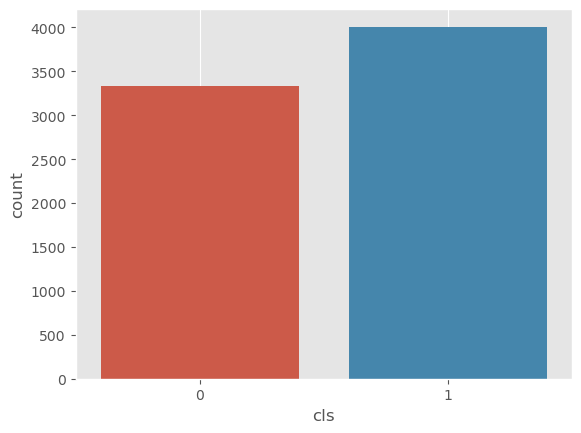

In [269]:
# converting data to sentence level for analysis
import matplotlib.pyplot as plt
import seaborn as sns

sentdata1 = sentdata.copy()
sns.countplot(x='cls', data=sentdata1)
plt.grid()


In [270]:
# total sentence level records 
len(sentdata1)

7344

In [271]:
# calculate length of each sentence

cols = ['sentlens']
sentlens = []


for j in range(len(sentdata1)):
    senlen = len(sentdata1['sentence'][j].split())
    sentlens.append(senlen)
    

sentdata1['sentlens'] = np.array(sentlens)
    
sentdata1

,sentence,cls,sentlens
0,NLP is a multidisciplinary field that draws fr...,0,16
1,"In terms of linguistics, a program must be abl...",0,49
2,Of course each language has its own forms of a...,0,10
3,Programs can use several strategies for dealin...,0,34
4,As formidable as the task of extracting the co...,0,26
...,...,...,...
7339,This involves minimizing the number of registe...,1,17
7340,Instruction Scheduling: The compiler reorders ...,1,21
7341,Code Emission: The compiler generates the fina...,1,17
7342,Optimization: The compiler may perform additio...,1,19


In [272]:
# minimum lenght of sentence
sentdata1['sentlens'].min()

1

In [273]:
# maximum lenght of sentence
sentdata1['sentlens'].max()

171

In [274]:
human=sentdata1.groupby('cls')

In [275]:
human.sentlens.mean()

cls
0    21.421463
1    21.789172
Name: sentlens, dtype: float64

In [276]:
sentdata1['sentlens'].mean()

21.622140522875817

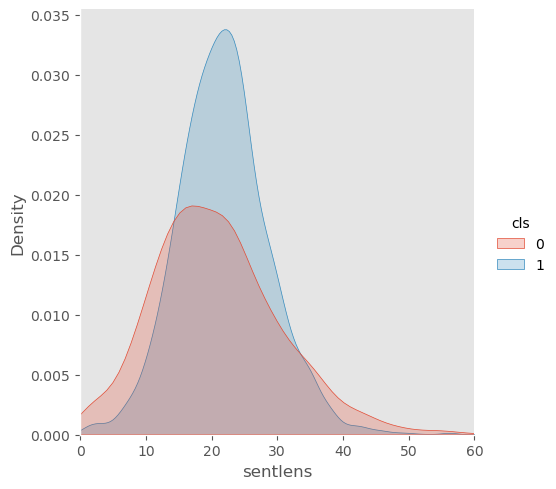

In [277]:
# sentence length probablity distribution
sns.displot(sentdata1, x="sentlens", hue="cls", kind="kde", fill=True)
plt.xlim(0, 60)
plt.grid()

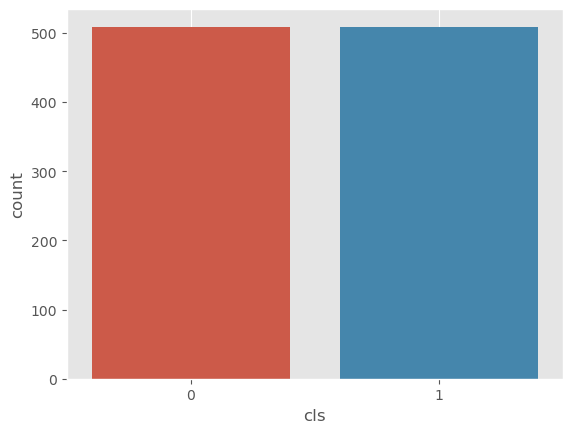

In [278]:
# paragraph level data analysis

import seaborn as sns
data1 = data.copy()
sns.countplot(x='cls', data=data1)
plt.grid()



In [279]:
# total article level records 
len(data1)

1018

In [280]:
# calculate length of each paragraph

cols = ['paralens']
paralens = []


for j in range(len(data1)):
    paralen = len(data1['cleanp'][j].split())
    paralens.append(paralen)
    

data1['paralens'] = np.array(paralens)
    
data1

,cleanp,cls,paralens
0,NLP is a multidisciplinary field that draws fr...,0,187
1,There are a variety of emerging applications f...,0,82
2,As each new means of communication and social ...,0,176
3,"These suggestions include:, Learn about the pu...",0,173
4,In recent years there has been growing concern...,0,111
...,...,...,...
1013,Palettes can refer to different things dependi...,1,132
1014,Probability is a measure of the likelihood tha...,1,148
1015,A compiler is a software program that translat...,1,217
1016,The compilation process is the process by whic...,1,238


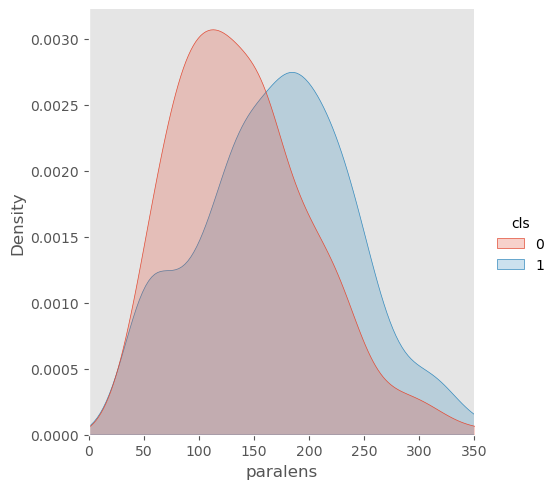

In [281]:
# paragraph length probablity distribution

sns.displot(data1, x="paralens", hue="cls", kind="kde", fill=True)
plt.xlim(0, 350)
plt.grid()

In [282]:
# minimum lenght of sentence
data1['paralens'].min()

26

In [283]:
# maximum lenght of sentence
data1['paralens'].max()

456

In [284]:
#average length of sentences in each class
human=data1.groupby('cls')
human.paralens.mean()

cls
0    140.396857
1    171.571709
Name: paralens, dtype: float64

### Data preprocessing for Machine Learning models

In [285]:
#performing tokenisation using spacy to convert text to numerical form
import spacy
nlp = spacy.load("en_core_web_lg")
data['vector'] = data['cleanp'].apply(lambda text: nlp(text).vector)  

In [286]:
data

,cleanp,cls,vector
0,NLP is a multidisciplinary field that draws fr...,0,"[-1.8836701, 0.47771224, -1.1232015, 0.0521150..."
1,There are a variety of emerging applications f...,0,"[-2.311638, -1.6605363, -0.8282042, 1.3762801,..."
2,As each new means of communication and social ...,0,"[-1.9235613, 0.30402324, -1.3203417, 0.0981003..."
3,"These suggestions include:, Learn about the pu...",0,"[-1.4809314, 0.8531074, -1.529263, -0.2555996,..."
4,In recent years there has been growing concern...,0,"[-2.6167812, -0.50970966, -2.0028265, 0.704959..."
...,...,...,...
1013,Palettes can refer to different things dependi...,1,"[-3.1741989, 1.0468854, -2.7742012, 0.18923098..."
1014,Probability is a measure of the likelihood tha...,1,"[-2.1461232, -0.39627567, -1.3561733, 0.780661..."
1015,A compiler is a software program that translat...,1,"[-1.6014613, 0.14110367, -0.48585984, 0.389496..."
1016,The compilation process is the process by whic...,1,"[-2.0775006, -0.20958309, 0.59049886, 0.627492..."


### Train-test-validation split and normalization

In [287]:
# Train-test-validation split 

from sklearn.model_selection import train_test_split

XP_train, XP_test, yp_train, yp_test = train_test_split(
    data.vector.values,
    data.cls,
    test_size=0.2,
    random_state=2022
    
)

XP_train_2d = np.stack(XP_train)
XP_test_2d = np.stack(XP_test)

# Normalization

from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


p_scaler = MinMaxScaler()
scaled_train_embed_p = p_scaler.fit_transform(XP_train_2d)
scaled_test_embed_p = p_scaler.transform(XP_test_2d)


In [288]:

#importing the previosuly split train test sets to ensure same split across all models 
import pickle
with open('train_test_splits.pkl', 'rb') as f:
    X_train, X_test, Y_train, Y_test = pickle.load(f)

In [289]:
X_train = X_train.apply(lambda text: nlp(text).vector)  

In [291]:
X_test = X_test.apply(lambda text: nlp(text).vector)  

In [292]:
Y_train=Y_train.flatten().tolist()

In [294]:
Y_test=Y_test.flatten().tolist()

[1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1]

In [296]:
XP_train_2d = np.stack(X_train)
XP_test_2d = np.stack(X_test)

# Normalization

from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


p_scaler = MinMaxScaler()
scaled_train_embed_p = p_scaler.fit_transform(XP_train_2d)
scaled_test_embed_p = p_scaler.transform(XP_test_2d)


In [297]:
scaled_train_embed_p

array([[0.69334424, 0.5625512 , 0.5562984 , ..., 0.8416134 , 0.48528567,
        0.21599069],
       [0.6908155 , 0.52220654, 0.35407323, ..., 0.20992082, 0.43195516,
        0.85088086],
       [0.28910768, 0.38706094, 0.53923357, ..., 0.35922927, 0.35659295,
        0.43302655],
       ...,
       [0.4949875 , 0.04242775, 0.7265636 , ..., 0.3499905 , 0.72246605,
        0.29338366],
       [0.65114754, 0.45100904, 0.48605788, ..., 0.6778714 , 0.6205137 ,
        0.19840808],
       [0.10737169, 0.36456007, 0.27579293, ..., 0.19262052, 0.4198361 ,
        0.53162646]], dtype=float32)

### multinomial Naive Bayes classifier - paragraph level

In [341]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
nb_clf = MultinomialNB()
nb_clf.fit(scaled_train_embed_p, Y_train)
yp_pred_nb = nb_clf.predict(scaled_test_embed_p)

print(classification_report(Y_test, yp_pred_nb))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        79
           1       0.82      0.78      0.80        74

    accuracy                           0.81       153
   macro avg       0.81      0.81      0.81       153
weighted avg       0.81      0.81      0.81       153



C:\Users\kship\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [342]:
from sklearn import metrics
print('Multinomial Naive Bayes')
print('Accuracy: {}'.format(metrics.accuracy_score(Y_test,yp_pred_nb)))
print('Precision: {}'.format(metrics.precision_score(Y_test,yp_pred_nb)))
print('Recall: {}'.format(metrics.recall_score(Y_test,yp_pred_nb)))

Multinomial Naive Bayes
Accuracy: 0.8104575163398693
Precision: 0.8169014084507042
Recall: 0.7837837837837838


In [392]:
#function to calculate confusion matirx percentage
def percentage_confusion_matrix(cm):
    total = np.sum(cm)
    return (cm / total) * 100


Text(95.72222222222221, 0.5, 'Truth')

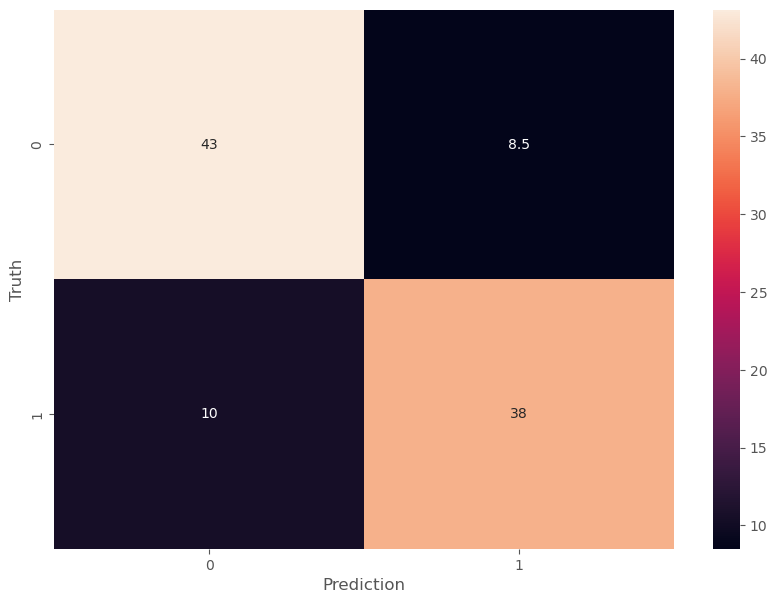

In [399]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, yp_pred_nb)
cm_p=percentage_confusion_matrix(cm)
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_p, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [344]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# predict probabilities
yhat = nb_clf.predict_proba(scaled_test_embed_p)
# retrieve just the probabilities for the positive class
pos_probs_nb = yhat[:, 1]



# calculate roc curve for model
fpr, tpr, _ = roc_curve(Y_test, pos_probs_nb)

tpr_list=[]
fpr_list=[]
tpr_list.append(tpr)
fpr_list.append(fpr)

### SVM classifier - paragraph level

In [345]:
from  sklearn import svm

#1. creating a KNN model object
svm_clf = svm.SVC(kernel='poly', degree=6, probability=True)

#2. fit with all_train_embeddings and y_train
svm_clf.fit(scaled_train_embed_p, Y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
yp_pred_svm = svm_clf.predict(scaled_test_embed_p)

#4. print the classfication report
print(classification_report(Y_test, yp_pred_svm))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        79
           1       0.92      0.93      0.93        74

    accuracy                           0.93       153
   macro avg       0.93      0.93      0.93       153
weighted avg       0.93      0.93      0.93       153



C:\Users\kship\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [346]:
print('Support Vector Machine')
print('Accuracy: {}'.format(metrics.accuracy_score(Y_test,yp_pred_svm)))
print('Precision: {}'.format(metrics.precision_score(Y_test,yp_pred_svm)))
print('Recall: {}'.format(metrics.recall_score(Y_test,yp_pred_svm)))

Support Vector Machine
Accuracy: 0.9281045751633987
Precision: 0.92
Recall: 0.9324324324324325


Text(0.5, 1.0, 'Percentage Confusion Matrix of SVM')

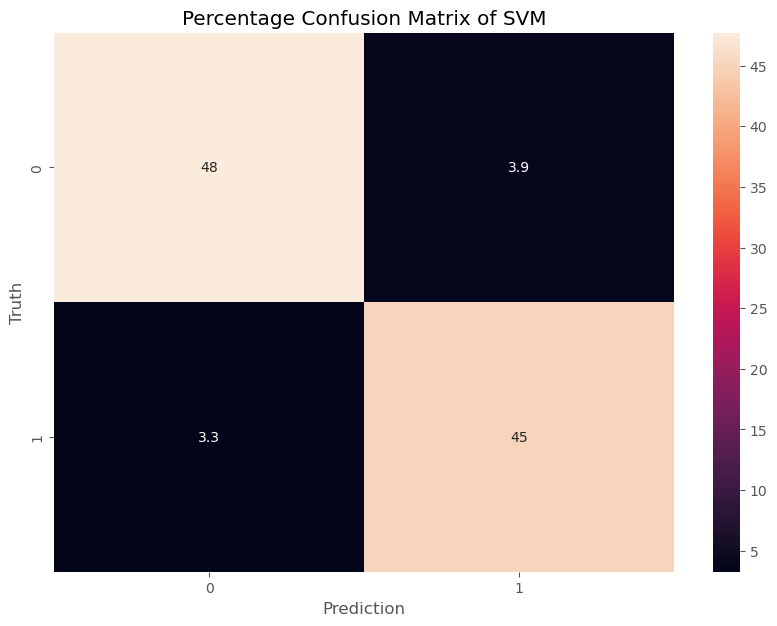

In [348]:
cm = confusion_matrix(Y_test, yp_pred_svm)
cm_p=percentage_confusion_matrix(cm)

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_p, annot=True, )
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Percentage Confusion Matrix of SVM')

In [349]:
# predict probabilities
yhat = svm_clf.predict_proba(scaled_test_embed_p)
# retrieve just the probabilities for the positive class
pos_probs_svm = yhat[:, 1]



# calculate roc curve for model
fpr, tpr, _ = roc_curve(Y_test, pos_probs_svm)
tpr_list.append(tpr)
fpr_list.append(fpr)

### Random Forest classifier - paragraph level

In [350]:
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(10,max_depth=10, random_state=0)
rf_clf.fit(scaled_train_embed_p, Y_train)

yp_pred_rf = rf_clf.predict(scaled_test_embed_p)


#print the classfication report
print(classification_report(Y_test, yp_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        79
           1       0.79      0.84      0.82        74

    accuracy                           0.82       153
   macro avg       0.82      0.82      0.82       153
weighted avg       0.82      0.82      0.82       153



C:\Users\kship\AppData\Local\Temp\ipykernel_40320\2810644039.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(scaled_train_embed_p, Y_train)


In [351]:
print('Random Forest')
print('Accuracy: {}'.format(metrics.accuracy_score(Y_test,yp_pred_rf)))
print('Precision: {}'.format(metrics.precision_score(Y_test,yp_pred_rf)))
print('Recall: {}'.format(metrics.recall_score(Y_test,yp_pred_rf)))

Random Forest
Accuracy: 0.8169934640522876
Precision: 0.7948717948717948
Recall: 0.8378378378378378


Text(0.5, 1.0, 'Percentage Confusion Matrix of Random Forest')

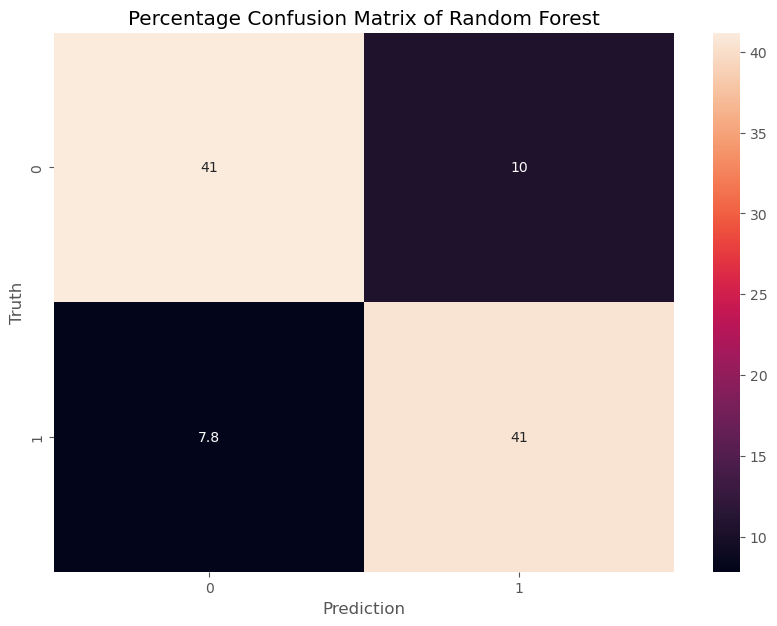

In [352]:
cm = confusion_matrix(Y_test, yp_pred_rf)
cm_p=percentage_confusion_matrix(cm)

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_p, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Percentage Confusion Matrix of Random Forest')

In [353]:
# predict probabilities
yhat = rf_clf.predict_proba(scaled_test_embed_p)
# retrieve just the probabilities for the positive class
pos_probs_rf = yhat[:, 1]



# calculate roc curve for model
fpr, tpr, _ = roc_curve(Y_test, pos_probs_rf)
tpr_list.append(tpr)
fpr_list.append(fpr)

### KNN classifier - paragraph level

In [354]:
from  sklearn.neighbors import KNeighborsClassifier

#1. creating a KNN model object
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
knn_clf.fit(scaled_train_embed_p, Y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
yp_pred_knn = knn_clf.predict(scaled_test_embed_p)

#4. print the classfication report
print(classification_report(Y_test, yp_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        79
           1       0.80      0.85      0.82        74

    accuracy                           0.82       153
   macro avg       0.82      0.82      0.82       153
weighted avg       0.83      0.82      0.82       153



C:\Users\kship\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\kship\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [355]:
print('K Nearest Neighbor')
print('Accuracy: {}'.format(metrics.accuracy_score(Y_test,yp_pred_knn)))
print('Precision: {}'.format(metrics.precision_score(Y_test,yp_pred_knn)))
print('Recall: {}'.format(metrics.recall_score(Y_test,yp_pred_knn)))

K Nearest Neighbor
Accuracy: 0.8235294117647058
Precision: 0.7974683544303798
Recall: 0.8513513513513513


Text(95.72222222222221, 0.5, 'Truth')

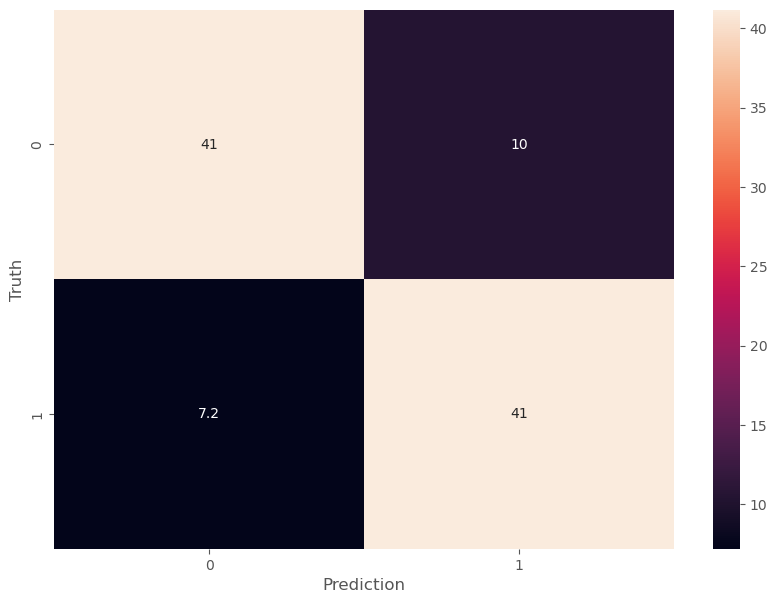

In [356]:
cm = confusion_matrix(Y_test, yp_pred_knn)
cm_p=percentage_confusion_matrix(cm)

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_p, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [357]:

# predict probabilities
yhat = knn_clf.predict_proba(scaled_test_embed_p)
# retrieve just the probabilities for the positive class
pos_probs_knn = yhat[:, 1]



# calculate roc curve for model
fpr, tpr, _ = roc_curve(Y_test, pos_probs_knn)
tpr_list.append(tpr)
fpr_list.append(fpr)

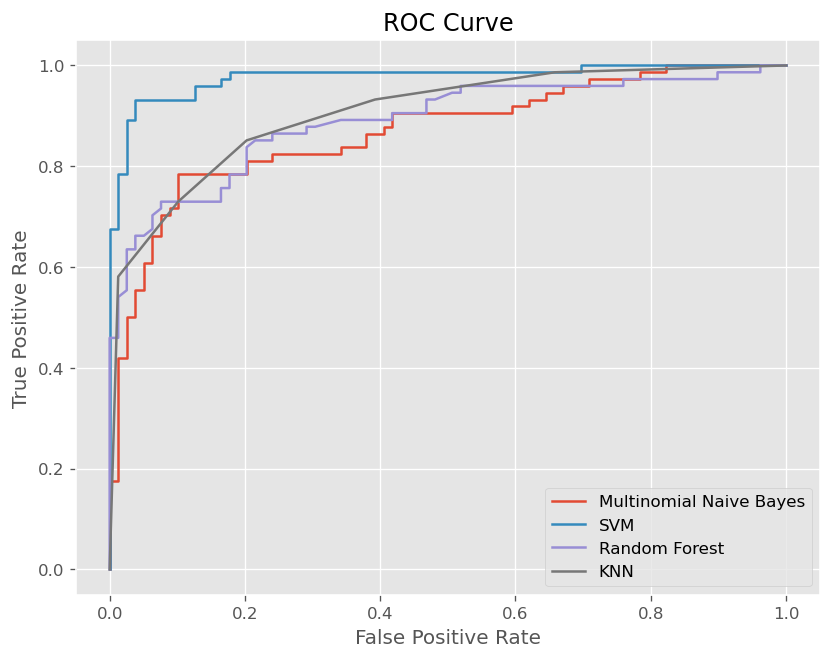

In [358]:
import matplotlib.pyplot as pyplot
algo=['Multinomial Naive Bayes','SVM','Random Forest','KNN']
pyplot.figure(figsize=(8,6), dpi=120)
for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], label=algo[i])
plt.title('ROC Curve')    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

## DEEP LEARNING - LSTM model

In [75]:
data

,cleanp,cls,vector
0,NLP is a multidisciplinary field that draws fr...,0,"[-1.8836701, 0.47771224, -1.1232015, 0.0521150..."
1,There are a variety of emerging applications f...,0,"[-2.311638, -1.6605363, -0.8282042, 1.3762801,..."
2,As each new means of communication and social ...,0,"[-1.9235613, 0.30402324, -1.3203417, 0.0981003..."
3,"These suggestions include:, Learn about the pu...",0,"[-1.4809314, 0.8531074, -1.529263, -0.2555996,..."
4,In recent years there has been growing concern...,0,"[-2.6167812, -0.50970966, -2.0028265, 0.704959..."
...,...,...,...
1013,Palettes can refer to different things dependi...,1,"[-3.1741989, 1.0468854, -2.7742012, 0.18923098..."
1014,Probability is a measure of the likelihood tha...,1,"[-2.1461232, -0.39627567, -1.3561733, 0.780661..."
1015,A compiler is a software program that translat...,1,"[-1.6014613, 0.14110367, -0.48585984, 0.389496..."
1016,The compilation process is the process by whic...,1,"[-2.0775006, -0.20958309, 0.59049886, 0.627492..."


In [76]:
data['Label']=data['cls'].map({0:'Human',1:'GPT'})

In [77]:
data.drop('vector',inplace=True,axis=1)
data.drop('cls',inplace=True,axis=1)

In [78]:
data

,cleanp,Label
0,NLP is a multidisciplinary field that draws fr...,Human
1,There are a variety of emerging applications f...,Human
2,As each new means of communication and social ...,Human
3,"These suggestions include:, Learn about the pu...",Human
4,In recent years there has been growing concern...,Human
...,...,...
1013,Palettes can refer to different things dependi...,GPT
1014,Probability is a measure of the likelihood tha...,GPT
1015,A compiler is a software program that translat...,GPT
1016,The compilation process is the process by whic...,GPT


In [79]:
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

X = data.cleanp
Y = data.Label
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [19]:
Y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [333]:
import pickle
with open('train_test_splits.pkl', 'rb') as f:
    X_train, X_test, Y_train, Y_test = pickle.load(f)

# Data preprocessing for LSTM model

In [83]:
max_words = 1000
max_len = 150 
#tokenisation
tok = Tokenizer(num_words=max_words)

#converting text to sequence with max length
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [84]:
sequences_matrix

array([[  0,   0,   0, ..., 693,   8, 109],
       [  0,   0,   0, ..., 174,   3,  13],
       [  0,   0,   0, ..., 992,  10,  40],
       ...,
       [  0,   0,   0, ...,   2, 829, 107],
       [  0,   0,   0, ...,  23, 799, 604],
       [  0,   0,   0, ..., 114,   5, 493]])

In [334]:
#defining LSTM based RNN model
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

### LSTM with Adam optimization

In [172]:

model=RNN()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])  

In [173]:
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_14 (Embedding)    (None, 150, 50)           50000     
                                                                 
 lstm_14 (LSTM)              (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_28 (Activation)  (None, 256)               0         
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257

In [174]:
history=model.fit(sequences_matrix,Y_train,batch_size=128,epochs=50,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=3,min_delta=0.0001)])

Epoch 1/50
6/6 [==============================] - 2s 174ms/step - loss: 0.6927 - accuracy: 0.5116 - val_loss: 0.6903 - val_accuracy: 0.5549
Epoch 2/50
6/6 [==============================] - 1s 137ms/step - loss: 0.6881 - accuracy: 0.6329 - val_loss: 0.6837 - val_accuracy: 0.6763
Epoch 3/50
6/6 [==============================] - 1s 129ms/step - loss: 0.6735 - accuracy: 0.7240 - val_loss: 0.6559 - val_accuracy: 0.7110
Epoch 4/50
6/6 [==============================] - 1s 118ms/step - loss: 0.6137 - accuracy: 0.7702 - val_loss: 0.5034 - val_accuracy: 0.8266
Epoch 5/50
6/6 [==============================] - 1s 111ms/step - loss: 0.5088 - accuracy: 0.8382 - val_loss: 0.4158 - val_accuracy: 0.8208
Epoch 6/50
6/6 [==============================] - 1s 109ms/step - loss: 0.3641 - accuracy: 0.8512 - val_loss: 0.3647 - val_accuracy: 0.8266
Epoch 7/50
6/6 [==============================] - 1s 121ms/step - loss: 0.2638 - accuracy: 0.8974 - val_loss: 0.2608 - val_accuracy: 0.8728
Epoch 8/50
6/6 [====

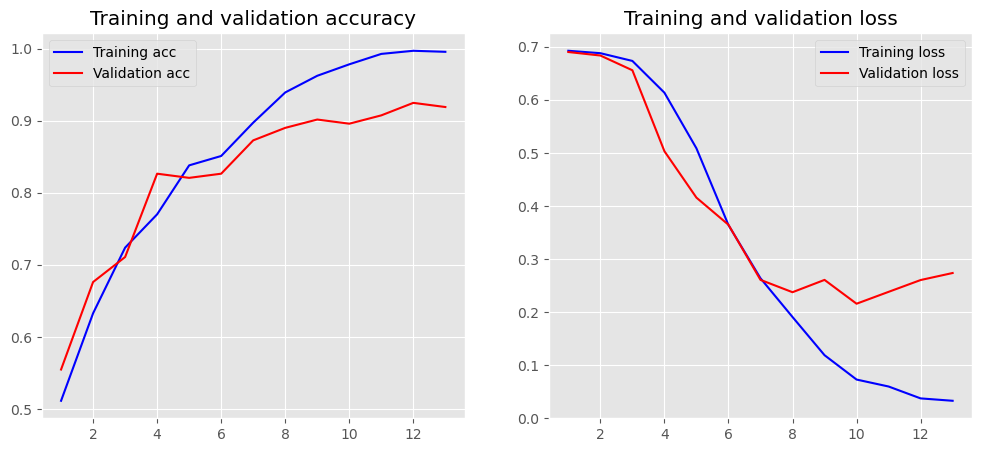

In [175]:
#plotting training and validation accuracy and loss
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)

In [176]:
#Tokenizing and padding test data 
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [177]:
accr = model.evaluate(test_sequences_matrix,Y_test)

5/5 [==============================] - 0s 13ms/step - loss: 0.2624 - accuracy: 0.9281


In [178]:
model1=RNN()
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])  

#restoring previosuly trained model to get same weights
filepath = "model_LSTM11.h5"
model1.load_weights(filepath)

In [179]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [240]:
loss, acc = model1.evaluate(test_sequences_matrix,Y_test)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

5/5 [==============================] - 0s 25ms/step - loss: 0.2020 - accuracy: 0.9412
Restored model, accuracy: 94.12%


In [241]:
y_prob=model1.predict(test_sequences_matrix)
y_pred = (y_prob > 0.5).astype(int)

5/5 [==============================] - 0s 20ms/step


Text(0.5, 1.0, 'Percentage Confusion Matrix of LSTM with Adam Optimizer')

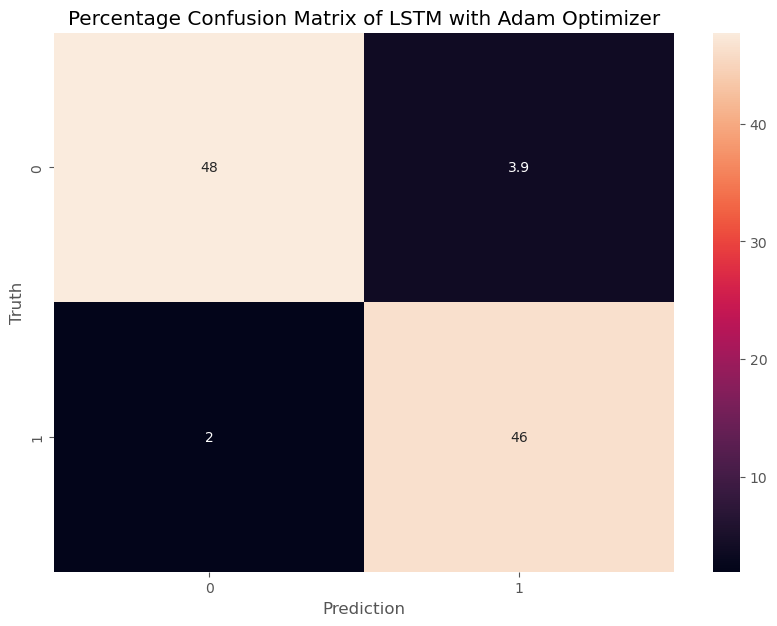

In [243]:
cm = confusion_matrix(Y_test, y_pred)
cm_p=percentage_confusion_matrix(cm)

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_p, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Percentage Confusion Matrix of LSTM with Adam Optimizer')

In [244]:
#storing tpr and fpr rate to plot roc curve
fpr_list_lstm=[]
tpr_list_lstm=[]
fpr, tpr, _ = roc_curve(Y_test,y_pred)
fpr_list_lstm.append(fpr)
tpr_list_lstm.append(tpr)

### LSTM with RMSProp 

In [165]:
from tensorflow.keras.optimizers import RMSProp
#LSTM with RMSprop optimizer
model2 = RNN()
model2.summary()
model2.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy']) 

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_13 (Embedding)    (None, 150, 50)           50000     
                                                                 
 lstm_13 (LSTM)              (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_26 (Activation)  (None, 256)               0         
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257

In [166]:
history=model2.fit(sequences_matrix,Y_train,batch_size=128,epochs=70,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=3,min_delta=0.0001)])

Epoch 1/70
6/6 [==============================] - 2s 174ms/step - loss: 0.6910 - accuracy: 0.5376 - val_loss: 0.6767 - val_accuracy: 0.6763
Epoch 2/70
6/6 [==============================] - 1s 135ms/step - loss: 0.6588 - accuracy: 0.6243 - val_loss: 0.5756 - val_accuracy: 0.8092
Epoch 3/70
6/6 [==============================] - 1s 121ms/step - loss: 0.4813 - accuracy: 0.8367 - val_loss: 0.4860 - val_accuracy: 0.7399
Epoch 4/70
6/6 [==============================] - 1s 142ms/step - loss: 0.3661 - accuracy: 0.8656 - val_loss: 0.4178 - val_accuracy: 0.7977
Epoch 5/70
6/6 [==============================] - 1s 142ms/step - loss: 0.3254 - accuracy: 0.8844 - val_loss: 0.2418 - val_accuracy: 0.9017
Epoch 6/70
6/6 [==============================] - 1s 142ms/step - loss: 0.2118 - accuracy: 0.9277 - val_loss: 0.2813 - val_accuracy: 0.8671
Epoch 7/70
6/6 [==============================] - 1s 131ms/step - loss: 0.1756 - accuracy: 0.9436 - val_loss: 0.2565 - val_accuracy: 0.8960
Epoch 8/70
6/6 [====

In [245]:
loss, acc = model2.evaluate(test_sequences_matrix,Y_test)
print("Test accuracy: {:5.2f}%".format(100 * acc))

5/5 [==============================] - 0s 20ms/step - loss: 0.2700 - accuracy: 0.9216
Test accuracy: 92.16%


In [246]:
y_prob=model2.predict(test_sequences_matrix)
y_pred = (y_prob > 0.5).astype(int)
print('Accuracy of LSTM with RMSProp: {}'.format(metrics.accuracy_score(Y_test,y_pred)))

5/5 [==============================] - 0s 22ms/step
Accuracy of LSTM with RMSProp: 0.9215686274509803


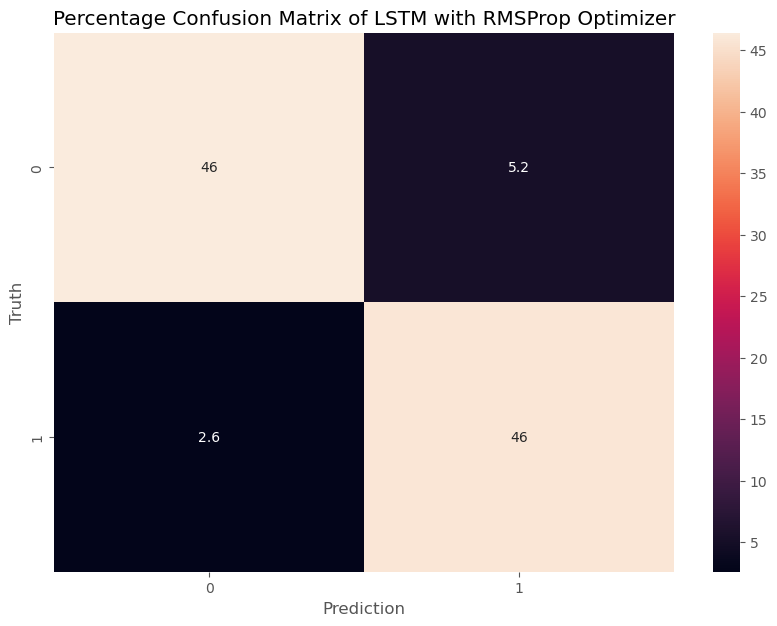

In [247]:
cm = confusion_matrix(Y_test, y_pred)
cm_p=percentage_confusion_matrix(cm)

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_p, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Percentage Confusion Matrix of LSTM with RMSProp Optimizer')

fpr, tpr, _ = roc_curve(Y_test,y_pred)
fpr_list_lstm.append(fpr)
tpr_list_lstm.append(tpr)

In [169]:
filepath = "model_LSTM_RMS.h5"
model2.save_weights(filepath.format(epoch=15))


### LSTM with Adamax

In [336]:

from tensorflow.keras.optimizers import Adamax

model3 = RNN()
model3.summary()
model3.compile(loss='binary_crossentropy',optimizer=Adamax(),metrics=['accuracy'])  #previous optimizer RMSProp()

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_24 (Embedding)    (None, 150, 50)           50000     
                                                                 
 lstm_24 (LSTM)              (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_48 (Activation)  (None, 256)               0         
                                                                 
 dropout_24 (Dropout)        (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257

In [337]:
history=model3.fit(sequences_matrix,Y_train,batch_size=128,epochs=30,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/30
6/6 [==============================] - 3s 266ms/step - loss: 0.6924 - accuracy: 0.5636 - val_loss: 0.6911 - val_accuracy: 0.6590
Epoch 2/30
6/6 [==============================] - 1s 223ms/step - loss: 0.6894 - accuracy: 0.6503 - val_loss: 0.6883 - val_accuracy: 0.6763
Epoch 3/30
6/6 [==============================] - 1s 216ms/step - loss: 0.6845 - accuracy: 0.6951 - val_loss: 0.6824 - val_accuracy: 0.7225
Epoch 4/30
6/6 [==============================] - 1s 215ms/step - loss: 0.6745 - accuracy: 0.7731 - val_loss: 0.6703 - val_accuracy: 0.7514
Epoch 5/30
6/6 [==============================] - 1s 221ms/step - loss: 0.6556 - accuracy: 0.8107 - val_loss: 0.6447 - val_accuracy: 0.7977
Epoch 6/30
6/6 [==============================] - 1s 232ms/step - loss: 0.6141 - accuracy: 0.8309 - val_loss: 0.5847 - val_accuracy: 0.7688
Epoch 7/30
6/6 [==============================] - 1s 209ms/step - loss: 0.5057 - accuracy: 0.8150 - val_loss: 0.4550 - val_accuracy: 0.7746
Epoch 8/30
6/6 [====

In [249]:
loss, acc = model3.evaluate(test_sequences_matrix,Y_test)
print("Test accuracy: {:5.2f}%".format(100 * acc))

5/5 [==============================] - 0s 19ms/step - loss: 0.2676 - accuracy: 0.8954
Test accuracy: 89.54%


In [250]:
y_prob=model3.predict(test_sequences_matrix)
y_pred = (y_prob > 0.5).astype(int)
print('Accuracy of LSTM with Adamax: {}'.format(metrics.accuracy_score(Y_test,y_pred)))

5/5 [==============================] - 0s 23ms/step
Accuracy of LSTM with Adamax: 0.8954248366013072


In [198]:
filepath = "model_LSTM_Adamax.h5"
model3.save_weights(filepath.format(epoch=15))


In [251]:
fpr, tpr, _ = roc_curve(Y_test,y_pred)
fpr_list_lstm.append(fpr)
tpr_list_lstm.append(tpr)

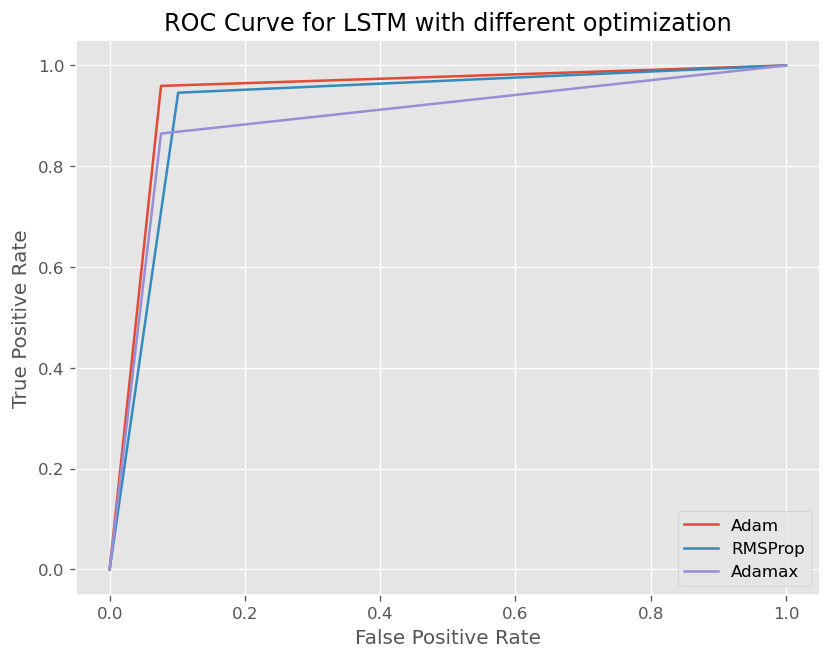

In [328]:
import matplotlib.pyplot as pyplot
algo=['Adam','RMSProp','Adamax']
pyplot.figure(figsize=(8,6), dpi=120)
for i in range(len(tpr_list_lstm)):
    plt.plot(fpr_list_lstm[i], tpr_list_lstm[i], label=algo[i])
plt.title('ROC Curve for LSTM with different optimization')    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

# HUGGING FACE MODEL

In [731]:
data

,cleanp,Label
0,NLP is a multidisciplinary field that draws fr...,Human
1,There are a variety of emerging applications f...,Human
2,As each new means of communication and social ...,Human
3,"These suggestions include:, Learn about the pu...",Human
4,In recent years there has been growing concern...,Human
...,...,...
1013,Palettes can refer to different things dependi...,GPT
1014,Probability is a measure of the likelihood tha...,GPT
1015,A compiler is a software program that translat...,GPT
1016,The compilation process is the process by whic...,GPT


In [732]:
data['labels']=data['Label'].map({'Human':0,'GPT':1})
data

,cleanp,Label,labels
0,NLP is a multidisciplinary field that draws fr...,Human,0
1,There are a variety of emerging applications f...,Human,0
2,As each new means of communication and social ...,Human,0
3,"These suggestions include:, Learn about the pu...",Human,0
4,In recent years there has been growing concern...,Human,0
...,...,...,...
1013,Palettes can refer to different things dependi...,GPT,1
1014,Probability is a measure of the likelihood tha...,GPT,1
1015,A compiler is a software program that translat...,GPT,1
1016,The compilation process is the process by whic...,GPT,1


In [733]:
data.drop('Label',inplace=True,axis=1)
data

,cleanp,labels
0,NLP is a multidisciplinary field that draws fr...,0
1,There are a variety of emerging applications f...,0
2,As each new means of communication and social ...,0
3,"These suggestions include:, Learn about the pu...",0
4,In recent years there has been growing concern...,0
...,...,...
1013,Palettes can refer to different things dependi...,1
1014,Probability is a measure of the likelihood tha...,1
1015,A compiler is a software program that translat...,1
1016,The compilation process is the process by whic...,1


In [734]:
data = data.sample(frac=1)

In [374]:
import pickle
with open('train_test_splits.pkl', 'rb') as f:
    X_train, X_test, Y_train, Y_test = pickle.load(f)

### Data preprocessing for DistilBERT model

In [375]:
Y_train=Y_train.flatten().tolist()

In [376]:
train=pd.DataFrame()
train['cleanp']=X_train
train['labels']=Y_train
train

,cleanp,labels
217,most interfaces between users and computer sys...,1
432,"With regard to databases, ensuring data securi...",1
729,The history of handwriting recognition systems...,0
739,Global trends can have a significant impact on...,0
159,The basic idea of VoIP is simple: the Internet...,1
...,...,...
1007,COBOL (Common Business Oriented Language) is a...,0
329,Click Wrap Agreement checks if a user meets ce...,1
985,Computer-aided software engineering (CASE) ref...,0
267,The role of the computer in film begins...,1


In [377]:
Y_test=Y_test.flatten().tolist()
test=pd.DataFrame()
test['cleanp']=X_test
test['labels']=Y_test
test

,cleanp,labels
276,Smart mobs are similar in organization t...,1
805,Computer science is a field of study that focu...,0
780,Firewalls serve several important functions in...,0
945,Data communications refer to the transmission ...,0
249,Popular groupware software suites such as Lotu...,1
...,...,...
941,Data security is the practice of protecting di...,0
28,"As with shoppers, investors have increasingly ...",1
759,Andrew Grove (1936-2016) was a Hungarian-Ameri...,0
279,"Until the mid-1990s, the floppy disk or ...",1


In [378]:
train.to_csv('train.csv', index=False)

In [379]:
test.to_csv('test.csv', index=False)

In [380]:
import datasets
from datasets import load_dataset
 
dataset = load_dataset('csv', data_files={'train': 'train.csv', 'test': 'test.csv'})
 
dataset

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to C:/Users/kship/.cache/huggingface/datasets/csv/default-404335de66b887ad/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['cleanp', 'labels'],
        num_rows: 865
    })
    test: Dataset({
        features: ['cleanp', 'labels'],
        num_rows: 153
    })
})

In [381]:
#performing tokenisation and padding on data
from transformers import AutoTokenizer
 
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased")
 
def tokenize_function(examples):
    return tokenizer(examples["cleanp"], padding="max_length", truncation=True)
 
tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/865 [00:00<?, ? examples/s]

Map:   0%|          | 0/153 [00:00<?, ? examples/s]

In [382]:
from transformers import AutoModelForSequenceClassification
checkpoint = "distilbert-base-cased"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'classifier.weigh

In [383]:
from datasets import load_metric
 
metric = load_metric("accuracy")
 
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

C:\Users\kship\AppData\Local\Temp\ipykernel_40320\860608572.py:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")
Using the latest cached version of the module from C:\Users\kship\.cache\huggingface\modules\datasets_modules\metrics\accuracy\9756d5fa4a0f9da966341741fc3926eafdc604b8276add51d5abbaa8958a25f9 (last modified on Tue Apr 11 10:50:18 2023) since it couldn't be found locally at accuracy, or remotely on the Hugging Face Hub.


In [384]:
from transformers import TrainingArguments, Trainer
 
training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch", num_train_epochs=10)
 
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    compute_metrics=compute_metrics
)
 
trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: cleanp. If cleanp are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
C:\Users\kship\anaconda3\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 865
  Num Epochs = 10
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 1090
  Number of trainable parameters = 65783042


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.412239,0.921569
2,No log,0.371856,0.934641
3,No log,0.347582,0.941176
4,No log,0.305416,0.947712
5,0.092700,0.169755,0.967320
6,0.092700,0.218709,0.960784
7,0.092700,0.210894,0.960784
8,0.092700,0.146674,0.980392
9,0.092700,0.137355,0.980392
10,0.017000,0.137261,0.980392


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: cleanp. If cleanp are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 153
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: cleanp. If cleanp are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 153
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: cleanp. If cleanp are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num exa

TrainOutput(global_step=1090, training_loss=0.05075508916596754, metrics={'train_runtime': 15322.7526, 'train_samples_per_second': 0.565, 'train_steps_per_second': 0.071, 'total_flos': 1145842998374400.0, 'train_loss': 0.05075508916596754, 'epoch': 10.0})

In [385]:
model.save_pretrained("chatGPTmodel")
  
tokenizer.save_pretrained("chatGPTmodel")

Configuration saved in chatGPTmodel\config.json
Model weights saved in chatGPTmodel\pytorch_model.bin
tokenizer config file saved in chatGPTmodel\tokenizer_config.json
Special tokens file saved in chatGPTmodel\special_tokens_map.json


('chatGPTmodel\\tokenizer_config.json',
 'chatGPTmodel\\special_tokens_map.json',
 'chatGPTmodel\\vocab.txt',
 'chatGPTmodel\\added_tokens.json',
 'chatGPTmodel\\tokenizer.json')

In [386]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer
load_model = AutoModelForSequenceClassification.from_pretrained("chatGPTmodel")
 
load_tokenizer = AutoTokenizer.from_pretrained("chatGPTmodel")

loading configuration file chatGPTmodel\config.json
Model config DistilBertConfig {
  "_name_or_path": "chatGPTmodel",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.26.1",
  "vocab_size": 28996
}

loading weights file chatGPTmodel\pytorch_model.bin
All model checkpoint weights were used when initializing DistilBertForSequenceClassification.

All the weights of DistilBertForSequenceClassification were initialized from the model checkpoint at chatGPTmodel.
If your task is similar to t

In [387]:
test.cleanp[211]

'The base 16 or hexadecimal system is a natural way to rep-resent the binary data stored in a computer.  It is more com-pact than binary because four binary digits can be replaced by a single “hex” digit. The  following  table  gives  the  corresponding  decimal, binary, and hex values from 0 to 15:Note that decimal and hex digits are the same from 0 to 9,  but  hex  uses  the  letters  A–F  to  represent  the  digits  cor-responding to decimal 10–15.  The system extends to higher numbers  using  increasing  powers  of  16,  just  as  decimal uses  powers  of  10:  For  example,  hex  FF  represents  binary 111  11111 or decimal 255.  many of the apparently arbitrary numbers encountered in programming can be better under-stood  if  one  realizes  that  they  correspond  to  convenient groupings of bits: FF is eight bits, sufficient to hold a single character ,.  In low-level pro-gramming memory addresses are also usually given in hex '

In [388]:
test.labels[211]

1

In [389]:
from transformers import TextClassificationPipeline

model = load_model
tokenizer = load_tokenizer
pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, return_all_scores=True)
# outputs a list of dicts 
# example generated by ChatGPT
pipe("The base 16 or hexadecimal system is a natural way to rep-resent the binary data stored in a computer.  It is more com-pact than binary because four binary digits can be replaced by a single “hex” digit. The  following  table  gives  the  corresponding  decimal, binary, and hex values from 0 to 15:Note that decimal and hex digits are the same from 0 to 9,  but  hex  uses  the  letters  A–F  to  represent  the  digits  cor-responding to decimal 10–15.  The system extends to higher numbers  using  increasing  powers  of  16,  just  as  decimal uses  powers  of  10:  For  example,  hex  FF  represents  binary 111  11111 or decimal 255.  many of the apparently arbitrary numbers encountered in programming can be better under-stood  if  one  realizes  that  they  correspond  to  convenient groupings of bits: FF is eight bits, sufficient to hold a single character ,.  In low-level pro-gramming memory addresses are also usually given in hex")

C:\Users\kship\anaconda3\lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[[{'label': 'LABEL_0', 'score': 2.8350525099085644e-05},
  {'label': 'LABEL_1', 'score': 0.9999716281890869}]]

In [390]:
predictions = trainer.predict(tokenized_datasets["test"])
print(predictions.predictions.shape, predictions.label_ids.shape)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: cleanp. If cleanp are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 153
  Batch size = 8


(153, 2) (153,)


In [391]:
import evaluate

#Defining 'preds' which has predictions made by model
preds = np.argmax(predictions.predictions, axis=-1)

#calculating performance of model
metric = evaluate.load("glue", "mrpc")
metric.compute(predictions=preds, references=predictions.label_ids)

{'accuracy': 0.9803921568627451, 'f1': 0.979591836734694}

In [398]:
print('Accuracy of DistilBERT {}:'.format(metrics.accuracy_score(predictions.label_ids,preds)))

Accuracy of DistilBERT 0.9803921568627451:


Text(95.72222222222221, 0.5, 'Truth')

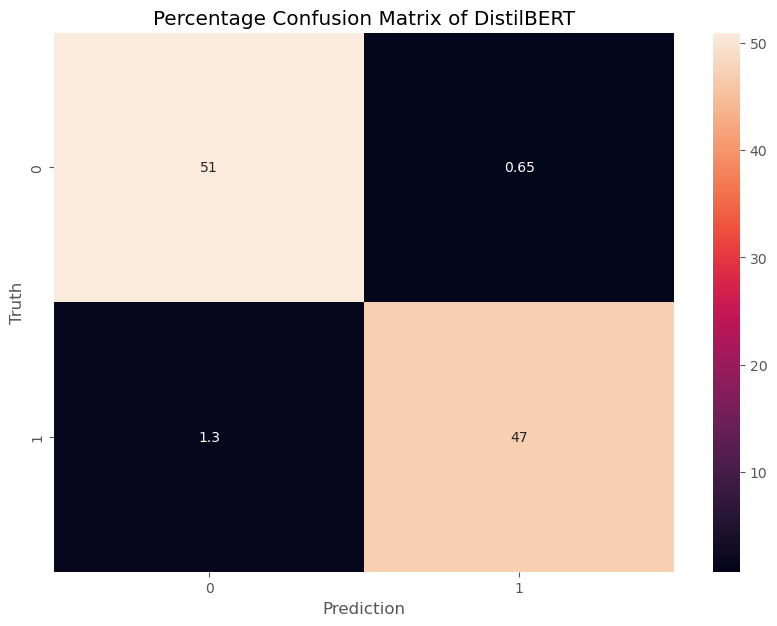

In [393]:
#Generating Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predictions.label_ids, preds)
cm_p=percentage_confusion_matrix(cm)

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_p, annot=True)
plt.title('Percentage Confusion Matrix of DistilBERT')
plt.xlabel('Prediction')
plt.ylabel('Truth')

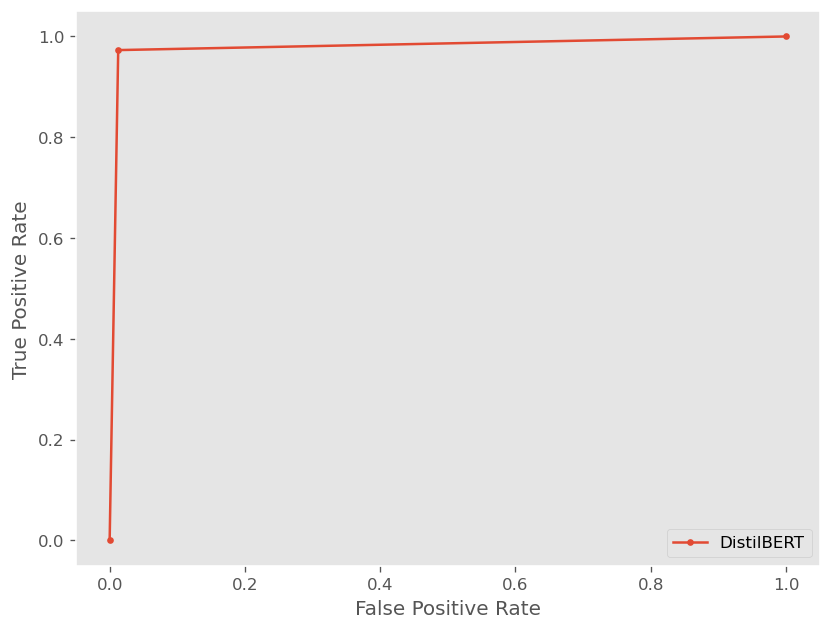

In [394]:
# calculate roc curve for model
fpr, tpr, _ = roc_curve(predictions.label_ids, preds)
# plot model roc curve
pyplot.figure(figsize=(8,6), dpi=120)
pyplot.plot(fpr, tpr, marker='.', label='DistilBERT')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
pyplot.grid()
# show the plot

pyplot.show()